In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train =pd.read_csv("titanic.csv")
test = pd.read_csv("titanic.csv")
train.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [3]:
print(train.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [4]:
train.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1138,3.0,0.0,"Reed, Mr. James George",male,NaN,0.0,0.0,362316,7.2500,NaN,S,NaN,NaN,NaN
946,3.0,0.0,"Lam, Mr. Len",male,NaN,0.0,0.0,1601,56.4958,NaN,S,NaN,NaN,NaN
1067,3.0,1.0,"Nysten, Miss. Anna Sofia",female,22.0,0.0,0.0,347081,7.7500,NaN,S,13,NaN,NaN
1096,3.0,0.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S,NaN,4.0,NaN
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


In [5]:
train.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [6]:
print(pd.isnull(train).sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


Percentage of females who survived: 72.7467811159
Percentage of males who survived: 19.0984578885


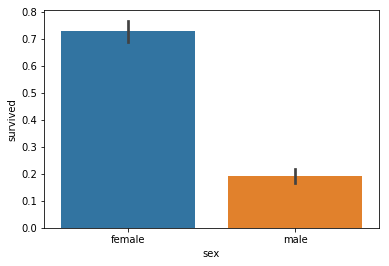

In [7]:
#sex vs survival
sns.barplot(x="sex", y="survived", data=train)
print("Percentage of females who survived:", train["survived"][train["sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["survived"][train["sex"] == 'male'].value_counts(normalize = True)[1]*100)
plt.show()

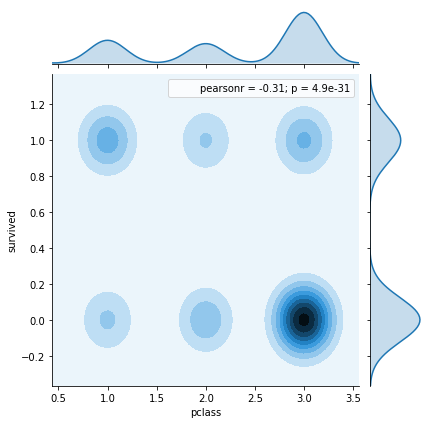

In [33]:
#survival per class

survival = sns.jointplot("pclass", "survived", data=train,
                   kind="kde")

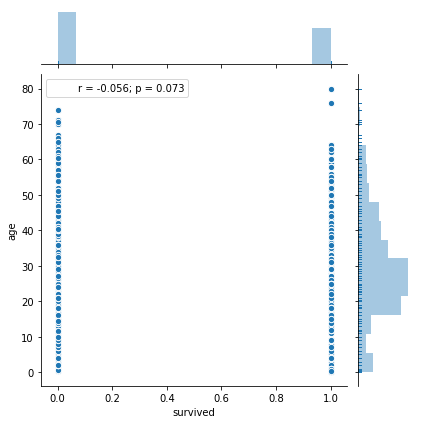

In [38]:
age = sns.jointplot("survived", "age", data=train,
                   marginal_kws=dict(bins=15, rug=True),
                   annot_kws=dict(stat="r"),
                   s=40, edgecolor="w", linewidth=1)

In [8]:
train["age"] = train["age"].fillna(-0.5)
test["age"] = test["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'senior']
train['ageGroup'] = pd.cut(train["age"], bins, labels = labels)
test['ageGroup'] = pd.cut(test["age"], bins, labels = labels)

#age vs. survival
sns.barplot(x="ageGroup", y="survived", data=train)
plt.show()train.head(3)

SyntaxError: invalid syntax (<ipython-input-8-a83d3ace51fb>, line 10)

In [9]:
train.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


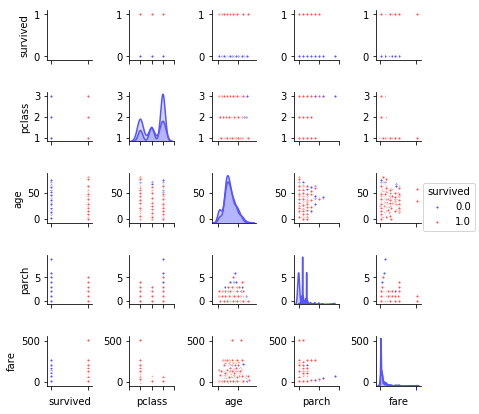

In [10]:
g = sns.pairplot(train[[u'survived', u'pclass', u'sex', u'age', u'parch', u'fare', u'embarked']], hue='survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [11]:
TEST=0.3
df=pd.read_csv('titanic.csv')
df = shuffle(df)
train, test = train_test_split(df, test_size=0.2)

In [42]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

train['title'] = train['name'].apply(get_title)

In [43]:
cnt = Counter()
for w in train['title']:
    cnt[w]+=1
print (cnt)
    

Counter({'Mr': 609, 'Miss': 204, 'Mrs': 159, 'Master': 49, 'Dr': 7, 'Rev': 5, 'Col': 4, 'Mlle': 2, 'Ms': 2, 'Jonkheer': 1, 'Don': 1, 'Lady': 1, 'Mme': 1, 'Countess': 1, 'Sir': 1})


In [57]:
#prediction - chances of survival
newtrain = train.dropna(thresh=2)
newtrain = newtrain[pd.to_numeric(newtrain['age'], errors='coerce').notnull()]
newtrain = newtrain[pd.to_numeric(newtrain['pclass'], errors='coerce').notnull()]
newtrain = newtrain[pd.to_numeric(newtrain['parch'], errors='coerce').notnull()]
newtrain = newtrain[pd.to_numeric(newtrain['survived'], errors='coerce').notnull()]

X = newtrain[['pclass', 'age', 'parch']]
y = newtrain['survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

score_ML = knn.score(X_test, y_test)
print(score_ML)


survived_prediction = knn.predict([[1, 50, 1]])
print(survived_prediction[0])
#1 survived, 0 died.


0.618320610687
1.0
